# Suicide Rates Overview 1985 to 2016
## by Aisulu Omar


## Content

This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

## References

United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

## Inspiration

Suicide Prevention.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('master.csv')

In [4]:
df_clean = data.copy()

### Assesing data 

First step will be assesing data to see if it needs any wrangling. 

In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Define

#### Removing one column in order to clean data 

In [5]:
df_clean.drop(['HDI for year'],axis=1,inplace=True)

In [6]:
nRow, nCol = df_clean.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 27820 rows and 11 columns


In [7]:
df_clean['country'].nunique()

101

In [8]:
print('Min : ',df_clean.year.min())
print('Max : ',df_clean.year.max())

Min :  1985
Max :  2016


In [9]:
df_clean.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

### Test

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
country               27820 non-null object
year                  27820 non-null object
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 2.3+ MB


### Data structure:
-  There are 27820 rows and 11 columns. 101 countries. Data was given from 1985 to 2016 years. 

### Main feautures of my interest: 
-  Distribution of suicides in different countires.

-  Dynamic of change of number of suicides from 1985 - 2016.

- Distribution of suicides between different generation. 

- Correlation of economic situation of the country and number of suicides per 100k population. 

- Number of suisides of males and females in different countires. 

- Correlation between country-year and number of suicides per 100k population. 

## Univariate Exploration

#### Now let's look at number of suicides of males and females in 31 years. I grouped data by sex to find the sum of suicides. 

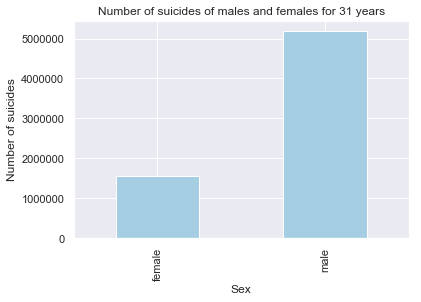

In [14]:
sex_total = df_clean.groupby('sex').suicides_no.sum()
sex_total.plot(kind='bar',colormap='Paired')
plt.title('Number of suicides of males and females for 31 years')
plt.xlabel('Sex')
plt.ylabel('Number of suicides');

In [10]:
sex_total

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64

### Define

To simplify data for my analysis I divided the range of years from 1985 to 2016 by three periods

In [9]:
def decade_mapping(data):
    if 1987 <= data <= 1996:
        return "1987-1996"
    elif 1997 <= data <= 2006:
        return "1997-2006"
    else:
        return "2007-2016"

df_clean.year = df_clean.year.apply(decade_mapping)

### Test

In [12]:
df_clean.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987-1996,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987-1996,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987-1996,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987-1996,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987-1996,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


#### Now, I would like to create barplots to find the distribution of siuicides throughtout three different periods. I also divided by sex. 

Text(0.5,1,'Suicide throughout three periods')

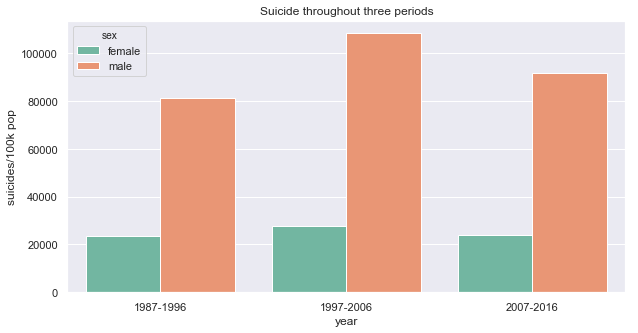

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x='year', y='suicides/100k pop',hue='sex',palette='Set2',data=df_clean.groupby(['year','sex']).sum().reset_index()).set_title('Suicide throughout three periods')

#### Findings:

- There is huge difference between number of suicides between males and females. The number of suicides of men for the given period is 3.3 higher than the females. 

- To look at this question further, I divided years from 1985-2016 by three periods: 1987-1996 (1st period), 1997-2006(2nd period), and 2007-2016(3rd period). The number of suicides for both males and females increased in the 2nd period and slighly decreased in 3rd period again. 

## Bivariate Exploration

#### Correlation between GDP per capita and number of suicides per 100k population

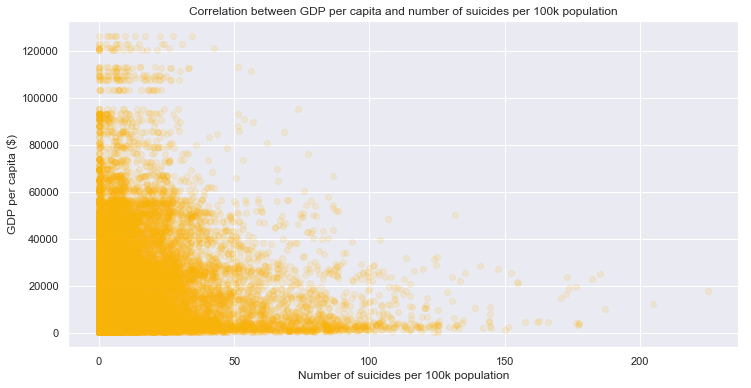

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(data=df_clean,x='suicides/100k pop',y='gdp_per_capita ($)',alpha=1/8)
plt.title('Correlation between GDP per capita and number of suicides per 100k population')
plt.xlabel('Number of suicides per 100k population')
plt.ylabel('GDP per capita ($)');

#### Findings:

- Most of the data falls in a large blob between 0 to 60000 (GDP per capita) on y axis, and between 0 to 50 (Number of suicides per 100k population) on x axis. 
- There is slight trend showing that countires with lower GDP have higher numbers of suicides. However, there are a lot of outliers. 

#### Let's look at total of suicides in 31 years in countires with the highest rate of suicide. I created a new dataframe with total of suicides for every country. I will visual only 10 countires with highest numbers. I used matplotlib's bar plot for this visualization. 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


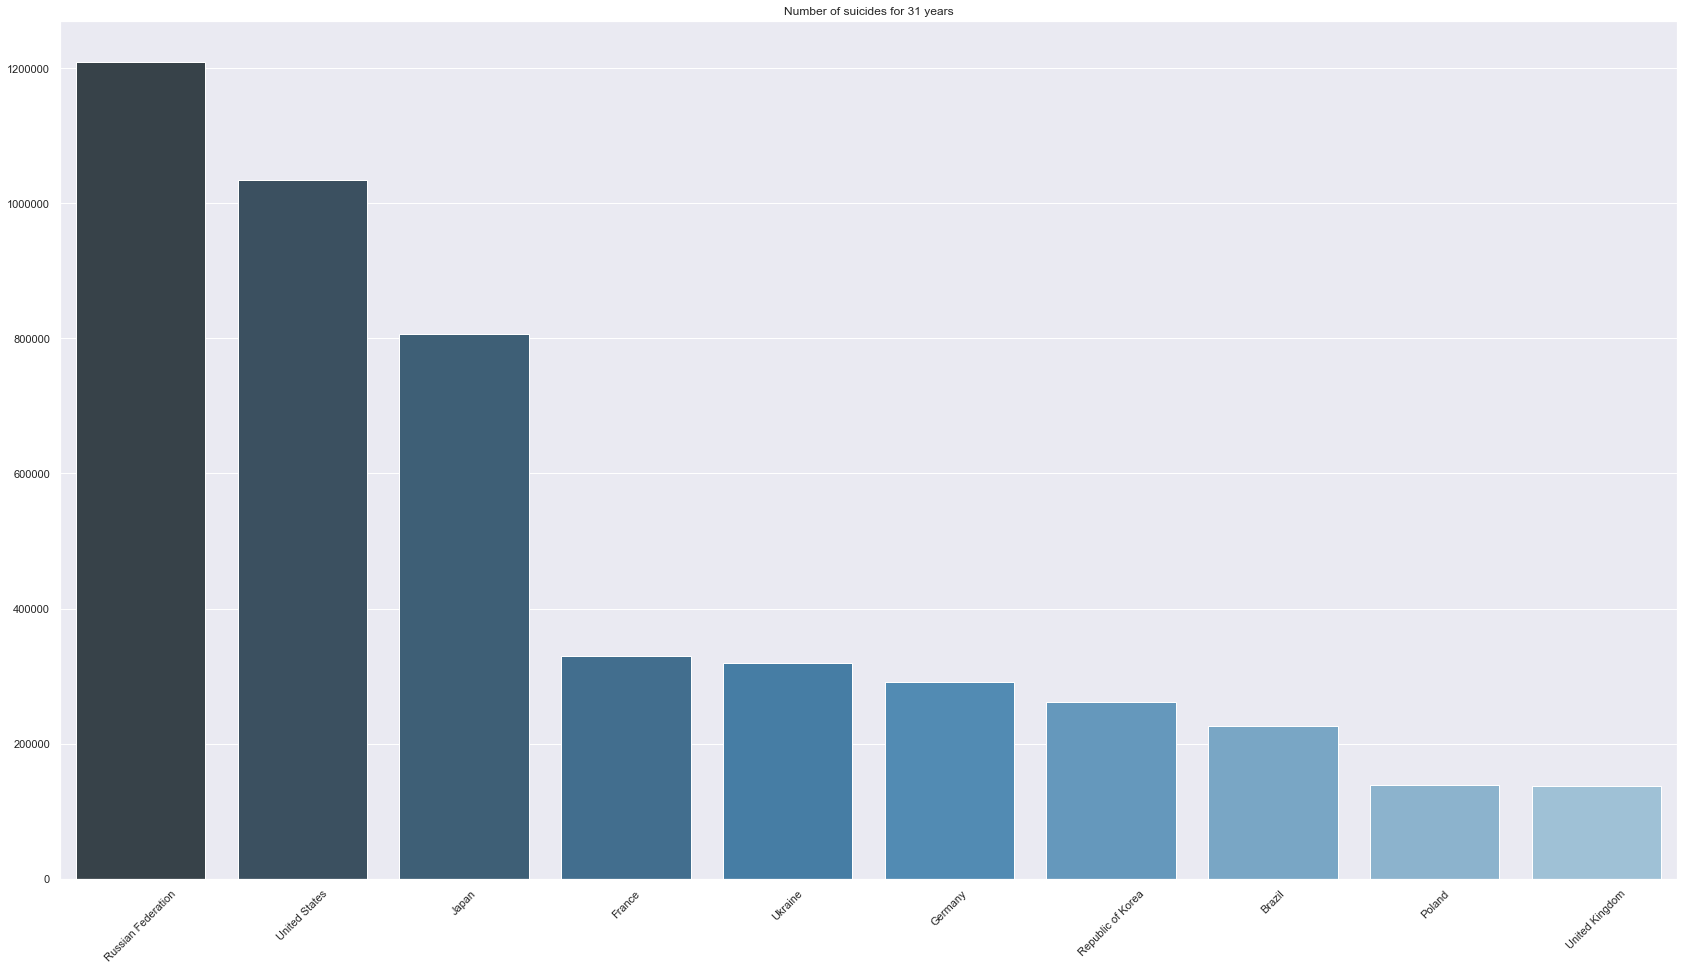

In [16]:
suic_total = pd.DataFrame(df_clean['suicides_no'].groupby(df_clean['country']).sum())
suic_total = suic_total.reset_index().sort_index(by='suicides_no',ascending=False)
top10 = suic_total.head(10)
fig = plt.figure(figsize=(24,14))
plt.title('Number of suicides for 31 years')
sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='country', data=top10, palette='Blues_d')
plt.xticks(rotation=45)
plt.ylabel('')
plt.xlabel('')
plt.tight_layout();


#### Russian Federation is the leading county for its number of suicides. In this case I used the total number suicides without considering the number of population in each country. Now I would like to look the number of suicides per 100k popilation. 

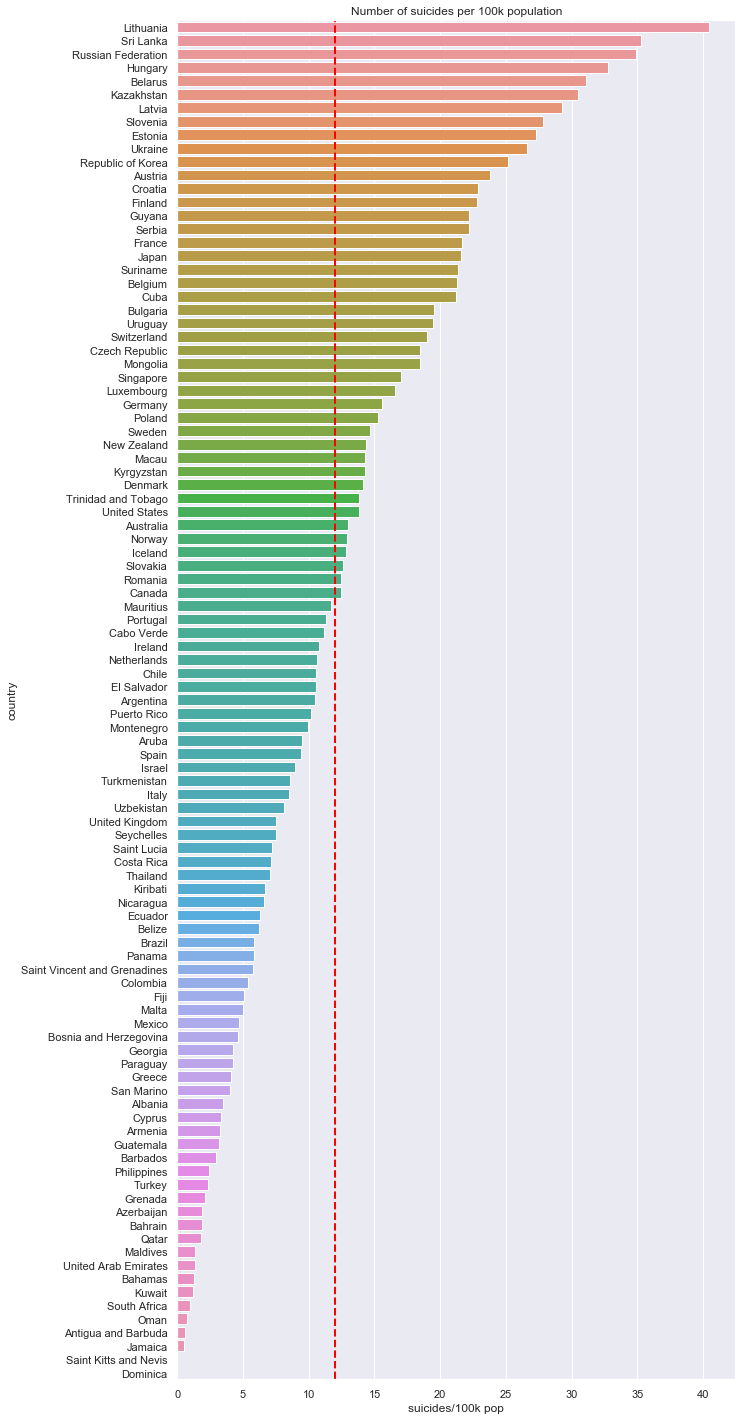

In [19]:
sns.set(style="darkgrid")
colors = ["amber", "windows blue", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

byCountry = df_clean.groupby('country').mean().sort_values('suicides/100k pop', ascending=False).reset_index()
plt.figure(figsize=(10,25))
sns.barplot(x='suicides/100k pop',y='country',data=byCountry)
plt.axvline(x= byCountry['suicides/100k pop'].mean(),color='red',ls='--',linewidth=2)
plt.title('Number of suicides per 100k population');



#### Findings:

- According to the numbers of suicides per 100k population, the country with the highest number of suicides is Lithuania and Russia is on the third place after Sri Lanka. 
- On the other hand, countries like Dominica and Saint Kitts and Nevis hasn't had any suicides for the past 31 years. 
- The average number of suicides per 100k population is between 10-15. 

## Multivariate Exploration

#### I am using seaborn's barplot to create multivariate exploration. I grouped my dataframe by generation and age to see if there any correlation with number of suicides per 100k population. 

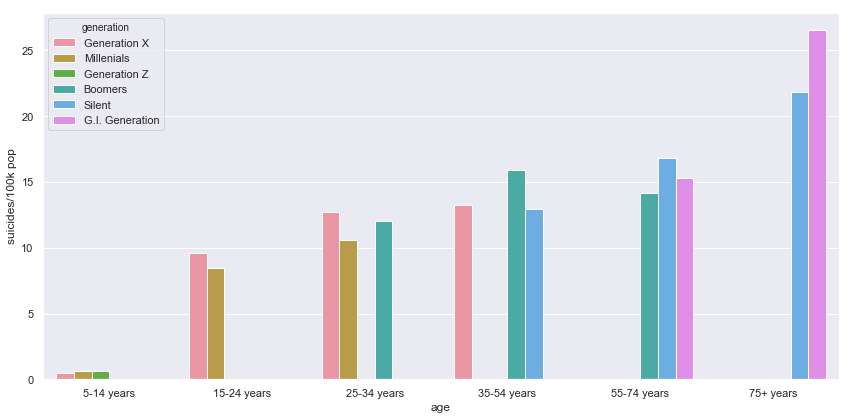

In [12]:
plt.figure(figsize=(12,6))

byAgeGen = df_clean.groupby(['age','generation']).mean().sort_values('suicides/100k pop',ascending=True).reset_index()
sns.barplot(x='age',y='suicides/100k pop',data=byAgeGen, hue='generation')
plt.tight_layout()

#### Findings:

- Number of suicides per 100k population is increasing with the age.
- G.I. and Silent Generation have the highest numbers of suicides. 